In [14]:
import numpy as np
import json

In [15]:
import rasterio
from rasterio.plot import show
fp = 'CA/Structures-Population/HUDen_CA.tif'
img = rasterio.open(fp)
# show(img)

In [16]:
print(img.crs)

EPSG:5070


In [17]:
affine = img.transform
affine

Affine(30.0, 0.0, -2356125.0,
       0.0, -30.0, 2452725.0)

In [18]:
print(img.width)
print(img.height)
print(img.count)
print(img.bounds)
print(img.driver)

23649
40346
1
BoundingBox(left=-2356125.0, bottom=1242345.0, right=-1646655.0, top=2452725.0)
GTiff


In [19]:
imarray = img.read(1)

In [20]:
#-124.409591	32.534156	-114.131211	42.009518 California Bounding

In [21]:
from pyproj import Transformer
transformer = Transformer.from_crs(img.crs, "epsg:4326")#Change to 32610 which is the salo epsg
transformer.transform(-1646655, 1242345)

(32.859809720792725, -113.803517692651)

In [22]:
# (41.8152747599704, -125.01334021680296) # (32.859809720792725, -113.803517692651)

In [23]:
len(imarray), len(imarray[0])

(40346, 23649)

In [24]:
origin = affine * (0, 0)
end = affine * (len(imarray[0]), len(imarray))
origin, end

((-2356125.0, 2452725.0), (-1646655.0, 1242345.0))

In [25]:
ori_lat_long_coords = transformer.transform(origin[0], origin[1])
end_lat_long_coords = transformer.transform(end[0], end[1])
ori_lat_long_coords, end_lat_long_coords

((41.8152747599704, -125.01334021680296),
 (32.859809720792725, -113.803517692651))

In [26]:
Santa_Clara_Bounds = ((37.48908544352257, -122.20127766290896),  (36.888272429602885, -121.21243727715039))
Nevada_Bounds = ((39.53775311661699, -121.27206566921241), (38.9831219249878, -120.01952940974721))

In [27]:
from pyproj import Transformer
reverse_transformer = Transformer.from_crs("epsg:4326", img.crs)#Change to 32610 which is the salo epsg
reverse_transformer.transform(37, -121.7)

(-2238210.688693346, 1855255.8714271209)

In [50]:
bottom_right = reverse_transformer.transform(Santa_Clara_Bounds[1][0], Santa_Clara_Bounds[1][1])
top_left = reverse_transformer.transform(Santa_Clara_Bounds[0][0], Santa_Clara_Bounds[0][1])
bottom_right, top_left

((-2200042.216985933, 1831798.4959051241),
 (-2265846.2014394025, 1919911.179234505))

In [58]:
affine * (5203, 20698)

(-2200035.0, 1831785.0)

In [59]:
transformer.transform(-2200035.0, 1831785.0)

(36.88817308005649, -121.21231831883607)

In [65]:
affine * (3009, 17760)

(-2265855.0, 1919925.0)

In [66]:
transformer.transform(-2265855.0, 1919925.0)

(37.48918273648376, -122.20141728528922)

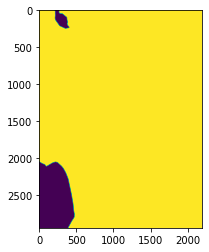

<AxesSubplot:>

In [67]:
portion = imarray[17760:20698]
new_arr = []
for i in range(len(portion)):
    new_arr.append(portion[i][3009:5203])
show(new_arr)

In [ ]:
#Santa Clara Bounds ((37.48908544352257, -122.20127766290896),   
 #(36.888272429602885, -121.21243727715039))
#Nevada Bounds ((39.53775311661699, -121.27206566921241),
 #(38.9831219249878, -120.01952940974721))

#Bottom left = (36.888272429602885, -122.20127766290896) 
#Top Right = (39.53775311661699, -120.01952940974721)

In [72]:
d = {}
i = 17760
while i < len(new_arr) + 17760:
    j = 3009
    while j < len(new_arr[0]) + 3009:
        epsg_coords = affine * (j, i)
        x = epsg_coords[0]
        y = epsg_coords[1]
        (latitude, longitude) = transformer.transform(x, y)
        d[str(latitude) + ", " + str(longitude)] = imarray[i][j]
        j += 1
    i += 1
    if (i - 17760) % (len(new_arr) // 100) == 0:
        print(str(int((i-17759) / len(new_arr) * 100)) + "%")

1%
2%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


In [73]:
max(d.values())

13902

In [74]:
len(d)

6445972

In [ ]:
# d = {}
# i = 0
# while i < int(len(imarray) / 2):
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
# #     latitude = topmost - i * 2 * delta_lat - 0.5 * delta_lat
#     row1 = imarray[2 * i]
#     row2 = imarray[2 * i + 1]
    
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
# #         longitude = leftmost + j * 2 * delta_long + 0.5 * delta_long
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2
#     i += 1
#     if i % (len(imarray) // 100) == 0:
#         print(str(int(i / len(imarray) * 200)) + "%")
# if i < len(imarray) / 2:
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2

In [75]:
len(d.keys())

6445972

In [76]:
d_key_list = list(d.keys())

In [77]:
d_key_list[860000]

'37.542577422809316, -121.45710890058365'

In [78]:
rightmost = -180
leftmost = -100
topmost = 20
bottommost = 80

In [79]:
for coord in d_key_list:
    lat = float(coord.split(", ")[0])
    long = float(coord.split(", ")[1])
    if long < leftmost:
        leftmost = long
    if long > rightmost:
        rightmost = long
    if lat > topmost:
        topmost = lat
    if lat < bottommost:
        bottommost = lat

In [80]:
rightmost, leftmost, topmost, bottommost

(-121.21273530228191,
 -122.20141728528922,
 37.646836909487405,
 36.732254422808445)

In [81]:
d[d_key_list[860000]]

0

In [82]:
import pickle
pickle_out = open("SantaClaraStructureLongLatUSDA.pickle", "wb")
pickle.dump(d, pickle_out)
pickle_out.close()

In [ ]:
d_key_list[0]

In [ ]:
d[d_key_list[0]]